In [2]:
import pandas as pd

techCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA"]

df = pd.read_csv("/content/"+techCompanies[0]+".csv", index_col=0)
# df = pd.DataFrame()

In [3]:
for i in range(1,len(techCompanies)):
  dfNew = pd.read_csv("/content/"+techCompanies[i]+".csv", index_col=0)
  df = df.merge(dfNew, on="Date", suffixes=["_"+techCompanies[i-1],"_"+techCompanies[i]])

In [4]:
df

,Close_AAPL,Date,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,...,Close_PYPL,High_PYPL,Low_PYPL,Open_PYPL,Volume_PYPL,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA
0,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",94.88,95.07,92.71,93.83,...,73.24,74.67,72.68,74.07,"12,485,600",183.26,183.80,177.14,177.31,"143,430,400"
1,150.47,"Mar 13, 2023",153.14,147.70,147.81,"84,457,100",92.43,94.02,88.12,89.97,...,72.61,73.97,71.09,72.62,"14,049,000",174.48,177.35,163.91,167.46,"167,790,300"
2,148.50,"Mar 10, 2023",150.94,147.61,150.21,"68,524,400",90.73,93.57,90.25,92.67,...,73.43,75.94,73.10,75.94,"13,118,800",173.44,178.29,168.44,175.13,"191,007,900"
3,150.59,"Mar 09, 2023",154.54,150.23,153.56,"53,833,600",92.25,96.21,92.18,93.68,...,75.93,79.26,75.72,76.96,"17,398,200",172.92,185.18,172.51,180.25,"170,023,800"
4,152.87,"Mar 08, 2023",153.47,151.83,152.81,"47,204,800",93.92,94.17,92.18,93.60,...,75.84,76.20,74.35,75.16,"9,467,900",182.00,186.50,180.00,185.04,"151,897,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,30.82,"Jul 10, 2015",30.96,30.30,30.49,"245,418,000",22.18,22.24,21.95,22.02,...,34.69,35.19,33.98,34.66,"4,472,800",17.28,17.53,17.19,17.48,"39,163,500"
2036,30.02,"Jul 09, 2015",31.01,29.81,30.96,"314,380,000",21.72,21.94,21.71,21.75,...,34.50,35.52,33.99,35.10,"3,760,100",17.19,17.53,17.12,17.27,"50,011,500"
2037,30.64,"Jul 08, 2015",31.16,30.64,31.12,"243,046,400",21.49,21.80,21.44,21.72,...,34.70,36.36,34.53,36.34,"5,387,700",17.00,17.39,16.95,17.29,"93,316,500"
2038,31.42,"Jul 07, 2015",31.54,30.94,31.47,"187,787,200",21.84,21.89,21.28,21.78,...,36.62,37.81,36.00,37.72,"7,359,000",17.86,18.35,17.38,18.33,"91,576,500"


In [5]:
df[["Open_AAPL", "Close_AAPL"]]

,Open_AAPL,Close_AAPL
0,151.28,152.59
1,147.81,150.47
2,150.21,148.50
3,153.56,150.59
4,152.81,152.87
...,...,...
2035,30.49,30.82
2036,30.96,30.02
2037,31.12,30.64
2038,31.47,31.42


In [6]:
for i in range(0,len(techCompanies)):
  company = techCompanies[i]
  df['Open_'+company] = pd.to_numeric(df['Open_'+company], errors='coerce')
  df["Change_"+company] = (df["Close_"+company] - df["Open_"+company]) / df["Open_"+company] * 100
  
df

,Close_AAPL,Date,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,...,Open_TSLA,Volume_TSLA,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA
0,152.59,"Mar 14, 2023",153.40,150.10,151.28,"73,628,400",94.88,95.07,92.71,93.83,...,177.31,"143,430,400",0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705
1,150.47,"Mar 13, 2023",153.14,147.70,147.81,"84,457,100",92.43,94.02,88.12,89.97,...,167.46,"167,790,300",1.799608,2.734245,1.203489,1.652057,2.635408,0.940577,-0.013770,4.192046
2,148.50,"Mar 10, 2023",150.94,147.61,150.21,"68,524,400",90.73,93.57,90.25,92.67,...,175.13,"191,007,900",-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997
3,150.59,"Mar 09, 2023",154.54,150.23,153.56,"53,833,600",92.25,96.21,92.18,93.68,...,180.25,"170,023,800",-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574
4,152.87,"Mar 08, 2023",153.47,151.83,152.81,"47,204,800",93.92,94.17,92.18,93.60,...,185.04,"151,897,800",0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,30.82,"Jul 10, 2015",30.96,30.30,30.49,"245,418,000",22.18,22.24,21.95,22.02,...,17.48,"39,163,500",1.082322,0.726612,0.760167,0.686892,-0.888691,0.610998,0.086555,-1.144165
2036,30.02,"Jul 09, 2015",31.01,29.81,30.96,"314,380,000",21.72,21.94,21.71,21.75,...,17.27,"50,011,500",-3.036176,-0.137931,-0.496942,-0.980053,-0.513966,-2.805611,-1.709402,-0.463231
2037,30.64,"Jul 08, 2015",31.16,30.64,31.12,"243,046,400",21.49,21.80,21.44,21.72,...,17.29,"93,316,500",-1.542416,-1.058932,-0.806142,-0.741685,-0.450045,-0.203252,-4.512933,-1.677270
2038,31.42,"Jul 07, 2015",31.54,30.94,31.47,"187,787,200",21.84,21.89,21.28,21.78,...,18.33,"91,576,500",-0.158881,0.275482,0.344037,-0.660592,-0.090212,-1.197605,-2.916225,-2.564103


In [7]:
columns = ["Change_"+a for a in techCompanies]
columns.append("Date")
dfDailyChange = df[columns]
dfDailyChange

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Date
0,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,"Mar 14, 2023"
1,1.799608,2.734245,1.203489,1.652057,2.635408,0.940577,-0.013770,4.192046,"Mar 13, 2023"
2,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,"Mar 10, 2023"
3,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,"Mar 09, 2023"
4,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,"Mar 08, 2023"
...,...,...,...,...,...,...,...,...,...
2035,1.082322,0.726612,0.760167,0.686892,-0.888691,0.610998,0.086555,-1.144165,"Jul 10, 2015"
2036,-3.036176,-0.137931,-0.496942,-0.980053,-0.513966,-2.805611,-1.709402,-0.463231,"Jul 09, 2015"
2037,-1.542416,-1.058932,-0.806142,-0.741685,-0.450045,-0.203252,-4.512933,-1.677270,"Jul 08, 2015"
2038,-0.158881,0.275482,0.344037,-0.660592,-0.090212,-1.197605,-2.916225,-2.564103,"Jul 07, 2015"


In [8]:

miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]

def getData(tickers):
  df = pd.read_csv("/content/"+tickers[0]+".csv", index_col=0)
  df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
  df = df.dropna()

  for i in range(1,len(tickers)):
    dfNew = pd.read_csv("/content/"+tickers[i]+".csv", index_col=0)
    # print(len(dfNew))
    dfNew['Open'] = pd.to_numeric(dfNew['Open'], errors='coerce')
    dfNew = dfNew.dropna()
    df = df.merge(dfNew, on="Date", suffixes=["_"+tickers[i-1],"_"+tickers[i]], how="outer")

  last = tickers[len(tickers)-1]
  # Readjust last one because its an exception
  df = df.rename(columns={'Open': 'Open_'+last, 'High': 'High_'+last, 'Low' : 'Low_'+last, 'Close': 'Close_'+last, 'Volume': 'Volume_'+last})
  
  for i in range(0,len(tickers)):
    company = tickers[i]
    # df['Open_'+company] = pd.to_numeric(df['Open_'+company])#, errors='coerce')
    df["Change_"+company] = (df["Close_"+company] - df["Open_"+company]) / df["Open_"+company] * 100

  columns = ["Change_"+a for a in tickers]
  columns.append("Date")
  dfPrices = df[columns]
  # dfPrices
  
  return dfPrices

dfMiningChange = getData(miningCompanies)
dfMiningChange

,Change_GLNCY,Change_BHP,Change_RIO,Change_VALE,Change_CSUAY,Change_NGLOY,Change_ZIJMF,Date
0,0.450045,0.859788,1.004367,0.441084,0.312500,0.960384,0.628931,"Mar 14, 2023"
1,-0.798580,-0.988305,-1.516477,-1.159243,-0.324675,-1.303318,0.000000,"Mar 10, 2023"
2,-0.889680,-1.619958,-1.827601,-1.495215,1.245847,-1.960784,0.000000,"Mar 09, 2023"
3,1.148410,-0.031606,0.463158,0.601685,-1.032566,1.189768,0.000000,"Mar 08, 2023"
4,-3.424658,-2.185535,-2.228991,-2.275449,-0.788644,-3.173687,0.636943,"Mar 07, 2023"
...,...,...,...,...,...,...,...,...
3241,NaN,0.163181,-0.237790,-1.491086,NaN,NaN,5.263158,"Apr 28, 2010"
3242,NaN,-2.609329,-3.259338,-4.213836,-1.126126,NaN,-1.234568,"Apr 27, 2010"
3243,NaN,-0.837473,-0.627651,-1.222494,0.000000,NaN,0.000000,"Apr 26, 2010"
3244,NaN,1.426700,2.140351,-0.123686,-1.123596,NaN,1.219512,"Apr 23, 2010"


# Retail

In [9]:
retailCompanies = ["WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW"]
dfRetailChange = getData(retailCompanies)
dfRetailChange

,Change_WMT,Change_COST,Change_HD,Change_JD,Change_KR,Change_WBA,Change_BABA,Change_TGT,Change_LOW,Date
0,0.297770,1.365080,-1.289319,1.150575,0.919786,-1.450562,1.194786,-0.876260,-1.288867,"Mar 14, 2023"
1,0.504829,1.113967,0.890876,1.083669,-0.403912,1.665657,-0.132514,1.023541,0.924696,"Mar 13, 2023"
2,-0.036491,-1.636812,-0.779734,-1.002935,0.319489,-0.329637,0.387222,-1.304049,-1.235436,"Mar 10, 2023"
3,-1.195707,-1.632888,-1.723255,-6.358122,-0.839454,-3.479269,-2.055921,-2.233583,-1.504280,"Mar 09, 2023"
4,-0.331986,0.629400,0.708264,3.230059,1.497326,0.789243,-0.503490,0.374463,1.473111,"Mar 08, 2023"
...,...,...,...,...,...,...,...,...,...,...
3241,-0.574926,-0.758853,-0.677392,NaN,0.434783,0.744133,NaN,-0.544624,-0.916422,"Apr 28, 2010"
3242,0.820896,-1.792531,-2.996152,NaN,-2.387042,-1.690141,NaN,-1.955017,-3.846154,"Apr 27, 2010"
3243,-0.898588,-0.215947,-0.082147,NaN,-0.169205,-0.111951,NaN,0.345722,0.071073,"Apr 26, 2010"
3244,0.110152,0.216414,1.761745,NaN,0.000000,-0.527046,NaN,0.730181,2.394775,"Apr 23, 2010"


# Construction

In [10]:
constructionCompanies = ["LEN", "LGIH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH"]
dfConstructionChange = getData(constructionCompanies)
dfConstructionChange

,Change_LEN,Change_LGIH,Change_PHM,Change_CAT,Change_CCS,Change_MTH,Change_TOL,Change_DHI,Change_KBH,Date
0,1.032685,NaN,NaN,-1.449845,-0.838037,0.169667,0.671372,1.025588,-0.729722,"Mar 14, 2023"
1,2.687558,NaN,NaN,0.952467,NaN,NaN,1.610905,3.318201,NaN,"Mar 13, 2023"
2,-1.546861,NaN,NaN,-3.935508,-2.276560,-4.019829,-2.265758,-1.165844,-3.187919,"Mar 10, 2023"
3,-0.494550,NaN,NaN,-3.209480,-1.496757,-1.257919,-2.033613,0.839087,-0.084317,"Mar 09, 2023"
4,1.662220,NaN,NaN,0.294367,1.145553,1.769422,0.489534,2.134379,0.650085,"Mar 08, 2023"
...,...,...,...,...,...,...,...,...,...,...
3241,1.062135,NaN,0.547303,-0.662538,NaN,0.888889,-0.447628,1.038576,0.719027,"Apr 28, 2010"
3242,-4.365691,NaN,-2.546296,-3.817544,NaN,-2.096070,-2.163355,-2.472727,-4.100106,"Apr 27, 2010"
3243,-0.353001,NaN,-1.212121,1.086343,NaN,-3.175930,-0.999131,-2.459592,-2.729145,"Apr 26, 2010"
3244,1.508296,NaN,5.267358,2.351190,NaN,6.678619,1.950355,2.755620,1.951477,"Apr 23, 2010"


# Cars

In [11]:
carCompanies = ["TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]
dfAutomobileChange = getData(carCompanies)
dfAutomobileChange

,Change_TM,Change_BYDDF,Change_VWAGY,Change_MBGYY,Change_STLA,Change_GM,Change_RACE,Change_F,Change_HMC,Date
0,0.190602,0.396040,-0.823723,0.359527,0.228702,-2.358749,0.129494,-2.293202,0.713436,"Mar 14, 2023"
1,-0.883621,-3.018868,-0.704607,-0.409207,-1.565996,-3.129973,-1.708244,-2.654867,-0.830816,"Mar 10, 2023"
2,-1.184192,-0.546448,-0.745871,-0.660905,-1.480263,-4.301619,-1.294052,-4.377880,-1.382144,"Mar 09, 2023"
3,0.157717,1.056082,-0.892388,0.101112,0.054054,0.151134,0.405853,1.564945,0.113122,"Mar 08, 2023"
4,-1.557191,-0.889047,-1.826722,-1.987084,-1.915913,-1.193436,-1.780361,-0.850077,-1.234568,"Mar 07, 2023"
...,...,...,...,...,...,...,...,...,...,...
3241,-1.936059,-1.702128,NaN,NaN,NaN,NaN,NaN,-6.024931,-1.733447,"Apr 27, 2010"
3242,-0.177305,2.789256,NaN,NaN,NaN,NaN,NaN,0.486449,0.629831,"Apr 26, 2010"
3243,1.676270,-0.108225,NaN,NaN,NaN,NaN,NaN,-0.070323,1.080607,"Apr 23, 2010"
3244,-0.232618,1.405405,NaN,NaN,NaN,NaN,NaN,1.428571,1.350954,"Apr 22, 2010"


# Exploration of data

In [12]:

techCompanies = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "PYPL", "TSLA"]
miningCompanies = ["GLNCY", "BHP", "RIO", "VALE", "CSUAY", "NGLOY", "ZIJMF"]
retailCompanies = ["WMT", "COST", "HD", "JD", "KR",  "WBA", "BABA", "TGT", "LOW"]
constructionCompanies = ["LEN", "LGIH", "DFH", "PHM", "CAT", "CCS", "MTH", "TOL", "DHI", "KBH"]
carCompanies = ["TM", "BYDDF", "VWAGY", "MBGYY", "STLA", "GM", "RACE", "F", "HMC"]

allCompanies = [techCompanies, miningCompanies, retailCompanies, constructionCompanies, carCompanies]

In [13]:
# dfM = pd.read_csv("/content/AAPL.csv", index_col=0)
# # dfM = dfM[dfM["Open"].str.isdigit()]
# # dfM

#   # df['Open_'+company] = 
# dfM['Open'] = pd.to_numeric(dfM['Open'], errors='coerce')
# # dfM.to_csv('/content/AAPL2.csv', encoding='utf-8')
# dfM

In [14]:
# for group in allCompanies:
#   for company in group:
#     dfM = pd.read_csv("/content/"+techCompanies[i]+".csv", index_col=0)
#     dfM = dfM[dfM["Open"] != "Dividend"]
#     dfM.to_csv('/content/'+techCompanies[i]+'.csv', encoding='utf-8')


In [15]:
columns = ["Change_"+a for a in techCompanies]
columns.append("Date")
dfAppleTech = dfDailyChange[columns]
# dfPrices = dfPrices.set_index(dfPrices["Date"])
dfAppleTech

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Date
0,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,"Mar 14, 2023"
1,1.799608,2.734245,1.203489,1.652057,2.635408,0.940577,-0.013770,4.192046,"Mar 13, 2023"
2,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,"Mar 10, 2023"
3,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,"Mar 09, 2023"
4,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,"Mar 08, 2023"
...,...,...,...,...,...,...,...,...,...
2035,1.082322,0.726612,0.760167,0.686892,-0.888691,0.610998,0.086555,-1.144165,"Jul 10, 2015"
2036,-3.036176,-0.137931,-0.496942,-0.980053,-0.513966,-2.805611,-1.709402,-0.463231,"Jul 09, 2015"
2037,-1.542416,-1.058932,-0.806142,-0.741685,-0.450045,-0.203252,-4.512933,-1.677270,"Jul 08, 2015"
2038,-0.158881,0.275482,0.344037,-0.660592,-0.090212,-1.197605,-2.916225,-2.564103,"Jul 07, 2015"


In [16]:
train_df = dfAppleTech.copy()
train_df.loc[train_df["Change_AAPL"] > 0, "positive"] = 3
train_df.loc[train_df["Change_AAPL"] <= 0, "positive"] = -3
train_df = train_df.dropna()
train_df

,Change_AAPL,Change_AMZN,Change_GOOG,Change_META,Change_MSFT,Change_NVDA,Change_PYPL,Change_TSLA,Date,positive
0,0.865944,1.119045,1.267863,3.433202,1.573515,2.413177,-1.120562,3.355705,"Mar 14, 2023",3.0
1,1.799608,2.734245,1.203489,1.652057,2.635408,0.940577,-0.013770,4.192046,"Mar 13, 2023",3.0
2,-1.138406,-2.093450,-1.610811,-0.828683,-0.991716,-1.896706,-3.305241,-0.964997,"Mar 10, 2023",-3.0
3,-1.934097,-1.526473,-1.936713,-2.500671,-1.368149,-3.056877,-1.338358,-4.066574,"Mar 09, 2023",-3.0
4,0.039264,0.341880,0.264831,1.148357,-0.133837,2.954826,0.904737,-1.642888,"Mar 08, 2023",3.0
...,...,...,...,...,...,...,...,...,...,...
2035,1.082322,0.726612,0.760167,0.686892,-0.888691,0.610998,0.086555,-1.144165,"Jul 10, 2015",3.0
2036,-3.036176,-0.137931,-0.496942,-0.980053,-0.513966,-2.805611,-1.709402,-0.463231,"Jul 09, 2015",-3.0
2037,-1.542416,-1.058932,-0.806142,-0.741685,-0.450045,-0.203252,-4.512933,-1.677270,"Jul 08, 2015",-3.0
2038,-0.158881,0.275482,0.344037,-0.660592,-0.090212,-1.197605,-2.916225,-2.564103,"Jul 07, 2015",-3.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

Cross Validated mean squared error: 0.996
how many days: 100


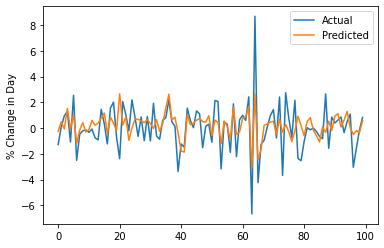

Num instances where predicted to go up and actually went up: 45
Num instances where predicted to go down and actually went down: 29
Num instances where predicted to go down and actually went up: 8
Num instances where predicted to go up and actually went down: 17
Proportion of instances where predicted correctly: 0.740
Proportion of instances where prediction was too low (would rather be >50%): 0.460


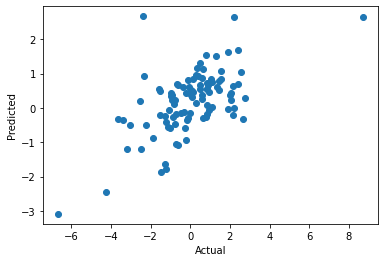

In [18]:
# @title Random Forest Regressor

#cross-validation

X = train_df.drop('Change_AAPL', axis=1)
X = X.drop('Date', axis=1)
X = X.drop('positive', axis=1)
y = train_df['Change_AAPL']

model_full = RandomForestRegressor()
scores = cross_val_score(model_full, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validated mean squared error: {np.sqrt(abs(scores.mean())):.3f}")


#testing on last x days
x = int(input("how many days: "))
train = train_df[:-x]
test = train_df[-x:]

model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train = train.drop('Change_AAPL', axis=1)
X_train = X_train.drop('Date', axis=1)
X_train = X_train.drop('positive', axis=1)
y_train = train['Change_AAPL']

model.fit(X_train, y_train)


X_test = test.drop('Change_AAPL', axis=1)
X_test = X_test.drop('Date', axis=1)
X_test = X_test.drop('positive', axis=1)
y_test = test['Change_AAPL']
y_pred = model.predict(X_test)

#plotting results
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylabel("% Change in Day")
plt.legend()
plt.show()

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Calculate the proportion of instances where both y_test and y_pred are either greater than zero or less than zero
positive_positive = ((y_test > 0) & (y_pred > 0)).sum() / len(y_test)
negative_negative = ((y_test < 0) & (y_pred < 0)).sum() / len(y_test)

# Print the results
a_positive_p_positive = ((y_test > 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went up: {a_positive_p_positive:}")
a_negative_p_negative = ((y_test < 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went down: {a_negative_p_negative:}")

a_positive_p_negative = ((y_test > 0) & (y_pred < 0)).sum()
print(f"Num instances where predicted to go down and actually went up: {a_positive_p_negative:}")
a_negative_p_positive = ((y_test < 0) & (y_pred > 0)).sum()
print(f"Num instances where predicted to go up and actually went down: {a_negative_p_positive:}")

predicted_correctly = positive_positive + negative_negative

# Print the results
print(f"Proportion of instances where predicted correctly: {predicted_correctly:.3f}")

undershot = (y_test - y_pred > 0).sum()
overshot = (y_test - y_pred < 0).sum()
print(f"Proportion of instances where prediction was too low (would rather be >50%): {undershot / (undershot + overshot):.3f}")